# RBC - Stock Prices Prediction

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader as webreader
import pandas as pd
import tensorflow as tf
import seaborn as sns
import datetime as dt
import pandas_datareader as webreader
from datetime import date, timedelta, datetime

## 2. Load Data

In [2]:
# Import dataset
df = pd.read_csv('RBC_StockPrices_2016-2021.csv')

# today = date.today()
# date_today = today.strftime("%Y-%m-%d")
# date_start = '2016-01-01'

# # Read stock quotes from Yahoo Finance
# df = webreader.DataReader('CM-PQ', data_source='yahoo', start=date_start, end=date_today)

# Input data of np array - Closing price
dataset = df.iloc[:, 4:5].values

print(dataset.shape)

(1254, 1)


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-13,80.190002,80.379997,79.750000,80.180000,65.923744,2335400
1,2016-09-14,79.980003,80.500000,79.860001,80.110001,65.866173,1481100
2,2016-09-15,80.169998,81.489998,80.160004,81.360001,66.893951,1777800
3,2016-09-16,81.190002,81.190002,80.449997,80.760002,66.400620,5653300
4,2016-09-19,81.000000,81.339996,80.519997,80.760002,66.400620,1582300
...,...,...,...,...,...,...,...
1249,2021-09-03,129.750000,129.830002,129.059998,129.479996,129.479996,1150600
1250,2021-09-07,129.699997,130.710007,129.300003,129.949997,129.949997,1522600
1251,2021-09-08,130.000000,130.580002,129.259995,129.440002,129.440002,1349400
1252,2021-09-09,129.330002,130.429993,129.080002,129.839996,129.839996,1292900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1254 non-null   object 
 1   Open       1254 non-null   float64
 2   High       1254 non-null   float64
 3   Low        1254 non-null   float64
 4   Close      1254 non-null   float64
 5   Adj Close  1254 non-null   float64
 6   Volume     1254 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.7+ KB


In [5]:
# Check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer.fit_transform(dataset)
# dataset = imputer.transform(dataset)
# df.dropna(inplace=True)

## 3. Visualize Data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff97e7d3210>,
      dtype=object)

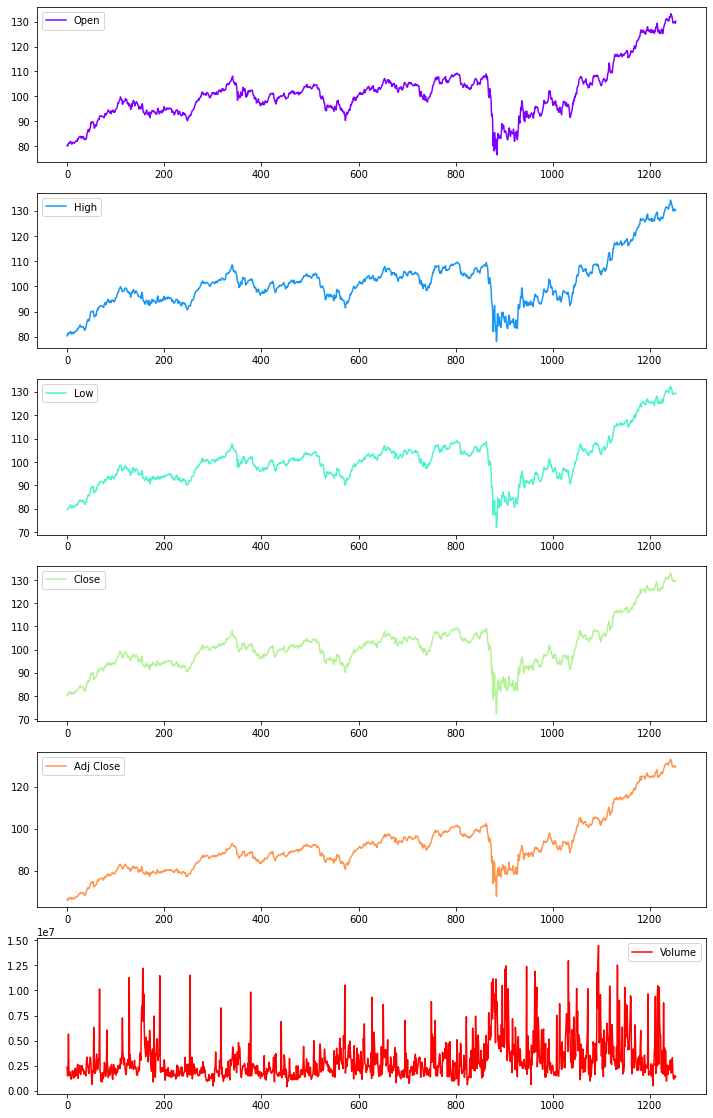

In [7]:
# Plot each data column
df.plot(subplots=True, figsize=(12,20), sharex=False, cmap='rainbow')

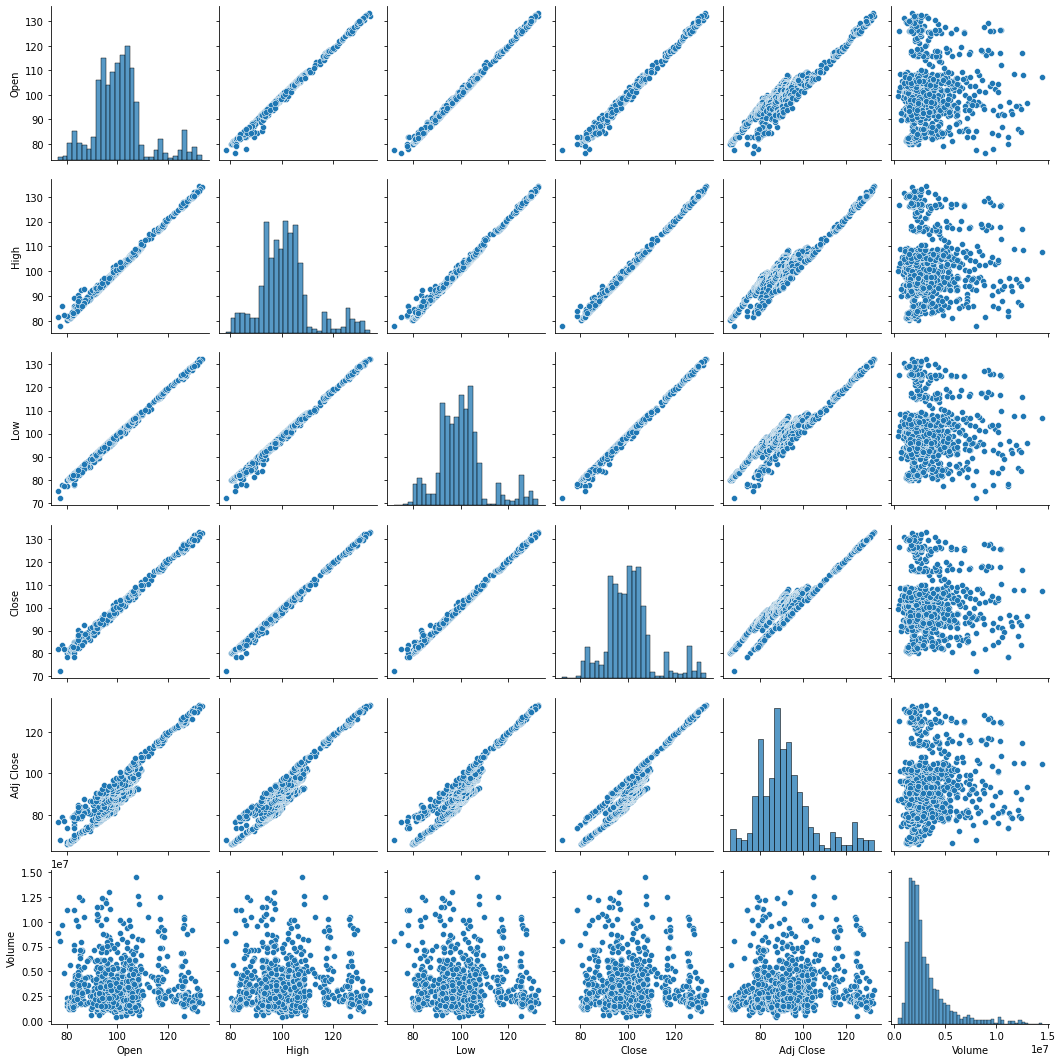

In [8]:
# Pariwise relationship between features
sns.pairplot(df)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

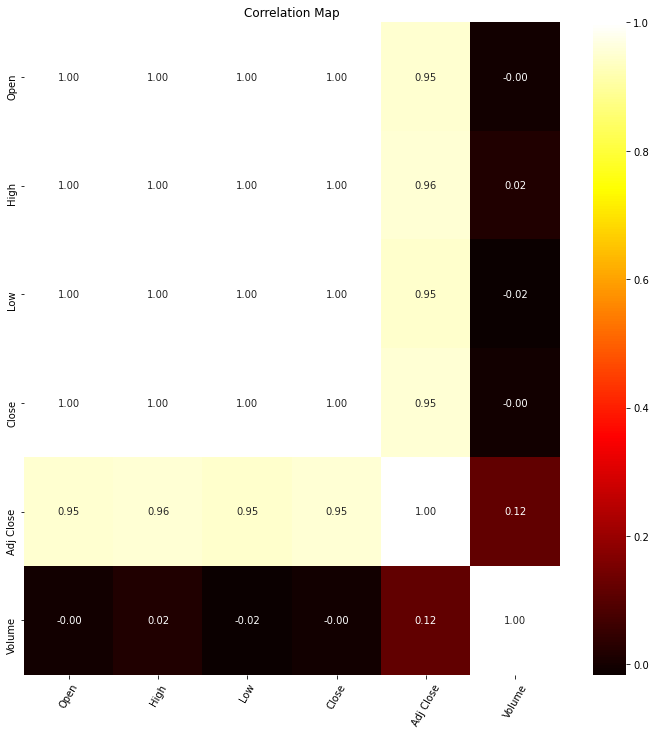

In [9]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='hot', fmt='.2f')
plt.title('Correlation Map')
plt.xticks(rotation=60)

## 4. Data Preprocessing and Feature Engineering

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Normalize data
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [12]:
dataset_scaled

array([[0.13021348],
       [0.12906407],
       [0.14958952],
       ...,
       [0.93908059],
       [0.94564863],
       [0.9422005 ]])

In [13]:
# Split dataset into training set and test set (80/20 split)
training_size = int(len(df)*0.8)
dataset_train = dataset_scaled[:training_size]
dataset_test = dataset_scaled[training_size:]

print('Training set shape: ' + str(dataset_train.shape))
print('Test set shape: ' + str(dataset_test.shape))

Training set shape: (1003, 1)
Test set shape: (251, 1)


#### Create a data structure with 60 timesteps and 1 output

In [14]:
# Predict stock price results using 60 timesteps (60 business days)
timesteps = 60

def define_training_data(timesteps, dataset):
  ''' 
  Define number of timesteps and features needed for training and 
  validating RNN model 
  '''

  # X - number of timesteps, y - indicators (features) used for training
  X, y = [], []
  for i in range(timesteps, dataset.shape[0]):
    X.append(dataset[i-timesteps:i, 0])
    y.append(dataset[i, 0])
  X, y = np.array(X), np.array(y)
  return X, y

X_train, y_train = define_training_data(timesteps, dataset_train)
print(X_train.shape, y_train.shape)

(943, 60) (943,)


#### Reshaping

In [15]:
# Reshape(number of rows, number of timesteps (columns), number of predictors)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
X_train

array([[[0.13021348],
        [0.12906407],
        [0.14958952],
        ...,
        [0.25418727],
        [0.25730705],
        [0.25894907]],

       [[0.12906407],
        [0.14958952],
        [0.13973732],
        ...,
        [0.25730705],
        [0.25894907],
        [0.26403947]],

       [[0.14958952],
        [0.13973732],
        [0.13973732],
        ...,
        [0.25894907],
        [0.26403947],
        [0.28210183]],

       ...,

       [[0.28965518],
        [0.3136289 ],
        [0.31395739],
        ...,
        [0.44154354],
        [0.42019702],
        [0.40492621]],

       [[0.3136289 ],
        [0.31395739],
        [0.33661744],
        ...,
        [0.42019702],
        [0.40492621],
        [0.39474554]],

       [[0.31395739],
        [0.33661744],
        [0.32873562],
        ...,
        [0.40492621],
        [0.39474554],
        [0.41461416]]])

In [17]:
X_train.shape

(943, 60, 1)

## 5. Define LSTM model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Epoch 1/100
30/30 [==============================] - 10s 133ms/step - loss: 0.0246
Epoch 2/100
30/30 [==============================] - 4s 139ms/step - loss: 0.0056
Epoch 3/100
30/30 [==============================] - 4s 132ms/step - loss: 0.0049
Epoch 4/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0046
Epoch 5/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0039
Epoch 6/100
30/30 [==============================] - 4s 141ms/step - loss: 0.0040
Epoch 7/100
30/30 [==============================] - 4s 129ms/step - loss: 0.0038
Epoch 8/100
30/30 [==============================] - 4s 130ms/step - loss: 0.0038
Epoch 9/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0031
Epoch 10/100
30/30 [==============================] - 4s 136ms/step - loss: 0.0029
Epoch 11/100
30/30 [==============================] - 4s 132ms/step - loss: 0.0034
Epoch 12/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0029
Epoch 13/100

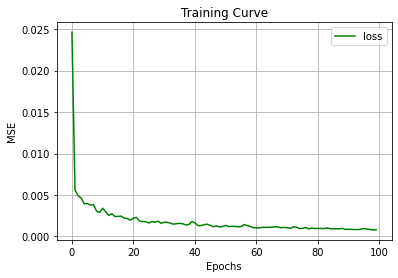

In [28]:
# Define model
reg = Sequential()

# LSTM layers
reg.add(LSTM(units=60, return_sequences=True, 
             input_shape=(X_train.shape[1], X_train.shape[2])))
reg.add(Dropout(0.2))
reg.add(LSTM(units=60, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=60, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50, return_sequences=False))
reg.add(Dropout(0.1))

# Output layer
reg.add(Dense(units=X_train.shape[2]))

# Compile model
reg.compile(optimizer='adam', loss='mean_squared_error')

# Train (fit) model
history = reg.fit(X_train, y_train, batch_size=32, epochs=100)

# Plot loss during training
plt.plot(history.history['loss'], 'g', label='loss')
plt.title('Training Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

## 6. Evalutate model

#### Make predictions

In [29]:
# Get 60 previous stock prices for predicting
inputs = dataset[len(dataset)-len(dataset_test) - timesteps:]
# Reshape input values
inputs = inputs.reshape(-1, 1)
# Scale input values, directly apply transformations (already fitted)
inputs = sc.transform(inputs)

# Define test set structure
X_test = []
# For the entire test set
for i in range(timesteps, timesteps + len(dataset_test)):
  # Range of values from i-60 to i, first column
  X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

# Obtain 3D structure of the test set
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Predict the test set results
predicted_stock_price = reg.predict(X_test)
# Apply inverse transformations
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(dataset_test)

# Print predicted and real stock prices side-by-side
print(np.concatenate((predicted_stock_price.reshape(len(predicted_stock_price), 1), 
                      real_stock_price.reshape(len(real_stock_price), 1)), 1 ))

# Print Scores
print('')
print('--- Prediction Scores ---')
print('')
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: ' + str(mae))
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: ' + str(mse))
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+ str(rmse))
r2 = r2_score(real_stock_price, predicted_stock_price)
print('R^2 Score: '+ str(r2))

[[ 96.75524139  97.18      ]
 [ 96.84043121  97.870003  ]
 [ 97.21234131  98.129997  ]
 [ 97.68598175  96.669998  ]
 [ 97.64342499  96.529999  ]
 [ 97.28012848  95.470001  ]
 [ 96.61930084  94.349998  ]
 [ 95.71443176  94.32      ]
 [ 94.94605255  93.629997  ]
 [ 94.31344604  94.190002  ]
 [ 94.04771423  94.489998  ]
 [ 94.12762451  95.559998  ]
 [ 94.61382294  93.910004  ]
 [ 94.75799561  93.489998  ]
 [ 94.50241089  93.559998  ]
 [ 94.14990234  94.269997  ]
 [ 94.05841064  95.519997  ]
 [ 94.46607971  95.639999  ]
 [ 95.06203461  97.669998  ]
 [ 96.06591797  97.709999  ]
 [ 97.04342651  97.349998  ]
 [ 97.59122467  97.300003  ]
 [ 97.73957062  97.080002  ]
 [ 97.6204071   97.07      ]
 [ 97.42922974  97.339996  ]
 [ 97.35427856  96.150002  ]
 [ 97.04841614  95.900002  ]
 [ 96.61696625  96.730003  ]
 [ 96.48704529  97.349998  ]
 [ 96.74408722  96.290001  ]
 [ 96.82272339  94.5       ]
 [ 96.25393677  92.910004  ]
 [ 95.09298706  91.190002  ]
 [ 93.55930328  92.889999  ]
 [ 92.68848419

#### Visualizing results

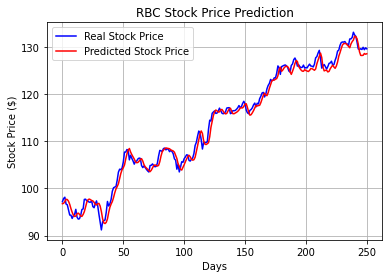

In [30]:
# Plot predicted and real closing stock prices
plt.plot(real_stock_price, color = 'blue', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title('RBC Stock Price Prediction')
plt.legend()
plt.grid()
plt.show()